In [2]:
import tabula
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap


#Data through October 24th, 2024
statewide_2020 = pd.read_csv('20201103EarlyAbsentee.csv') #original located https://sos-tn-gov-files.tnsosfiles.com/20201103EarlyAbsentee.csv
statewide_2024 = pd.read_excel('20241105EarlyAbsentee1030.xlsx') #original located https://sos-prod.tnsosgovfiles.com/s3fs-public/document/20241105EarlyAbsentee1030.xlsx
statewide_2016 = pd.read_csv('shelby_2016.csv') #original located https://tnsos.org/elections/ElectionData/20161108EarlyVotersDisplay.php?All
shelby_reg_voters = pd.read_excel('October 2024 Stat File Final.xlsx') #original https://www.electionsshelbytn.gov/sites/default/files/documents/scec/vrstatistics/October%202024%20Stat%20File%20Final.xlsx
ev_location_2024 = tabula.read_pdf('Daily Report for Web through Oct 30.pdf', pages=1, pandas_options={'header': None})[0] #original https://www.electionsshelbytn.gov/sites/default/files/documents/Daily%20Report%20for%20Web%20through%20Oct%2030.pdf
ev_location_gis = pd.read_csv('shelby_location_gis.csv')

ev_location_2024.loc[32, 17] = '0'
data_col_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
#for i in ev_location_2024:
#    ev_location_2024.loc[30, i] = ev_location_2024.loc[30, i].replace(',', '')
#    ev_location_2024.loc[30, i] = ev_location_2024.loc[30, i].replace('-', '0')
#    ev_location_2024.loc[32, i] = ev_location_2024.loc[32, i].replace(',', '')

ev_location_2024 = ev_location_2024.drop([29, 30, 31, 32])

ev_location_2024 = ev_location_2024.fillna('0')

for i in range(len(ev_location_2024[17])):
    ev_location_2024.loc[i, 17] = ev_location_2024.loc[i, 17].replace(',', '')

for i in data_col_list:
    ev_location_2024[i] = ev_location_2024[i].astype(int)

ev_location_2024 = ev_location_2024.rename(columns={0: 'Location', 1: '10/16', 2: '10/17', 3: '10/18', 4: '10/19', 5: '10/20', 6: '10/21', 7: '10/22', 8: '10/23', 9: '10/24', 10: '10/25', 11: '10/26', 12: '10/27', 13: '10/28', 14: '10/29', 15: '10/30', 16: '10/31', 17: 'Total'})

print(ev_location_2024)

shelby_2016 = statewide_2016.loc[statewide_2016['County'] == 'Shelby']
shelby_2016['Day'] = list(range(len(shelby_2016)))

shelby_2020 = statewide_2020.loc[statewide_2020['County'] == 'Shelby']
#shelby_2020 = shelby_2020.reset_index()
shelby_2020['Day'] = list(range(len(shelby_2020)))

shelby_2024 = statewide_2024.loc[statewide_2024['County'] == 'Shelby']
#shelby_2024 = shelby_2024.reset_index()
shelby_2024['Day'] = list(range(len(shelby_2024)))
shelby_2024['Registered Voters'] = shelby_reg_voters.loc[336, 'Total Voters']
shelby_2024['Percentage By Day'] = (shelby_2024['Day Total']/shelby_2024['Registered Voters'])*100





                                Location  10/16  10/17  10/18  10/19  10/20  \
0                         Abundant Grace    731    640    574    448      0   
1              Anointed Temple Of Praise    936    949    995    862      0   
2                    Arlington Safe Room    746    673    617    421      0   
3                 Baker Community Center    919    862    785    436      0   
4                       Briarwood Church   1072   1029   1014    848      0   
5                    Collierville C.O.C.    850    855    955    936      0   
6                      Compassion Church   1031    872    962    835      0   
7            Dave Wells Community Center    403    324    305    168      0   
8               Ed Rice Community Center    316    285    312    173      0   
9               Gaisman Community Center    384    292    318    215      0   
10             Glenview Community Center    640    543    444    304      0   
11           Greater Lewis Street Church    758    7

/tmp/ipykernel_17213/2421087147.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelby_2016['Day'] = list(range(len(shelby_2016)))
/tmp/ipykernel_17213/2421087147.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shelby_2020['Day'] = list(range(len(shelby_2020)))
/tmp/ipykernel_17213/2421087147.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

Text(0.5, 1.0, 'Shelby County, TN Absentee 2020/2024 Comparison (ending 10/30)')

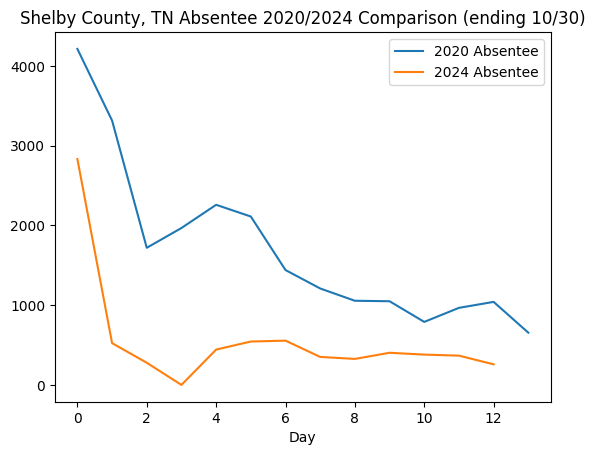

In [178]:

ax = plt.gca()
shelby_2020.plot(x="Day", y="Absentee", label="2020 Absentee", ax= ax )
shelby_2024.plot(x="Day", y="Absentee", label="2024 Absentee", ax=ax)
plt.title("Shelby County, TN Absentee 2020/2024 Comparison (ending 10/30)")
#plt.show()

Text(0.5, 1.0, 'Shelby County, TN Early Voting 2020/2024 Comparison (ending 10/30)')

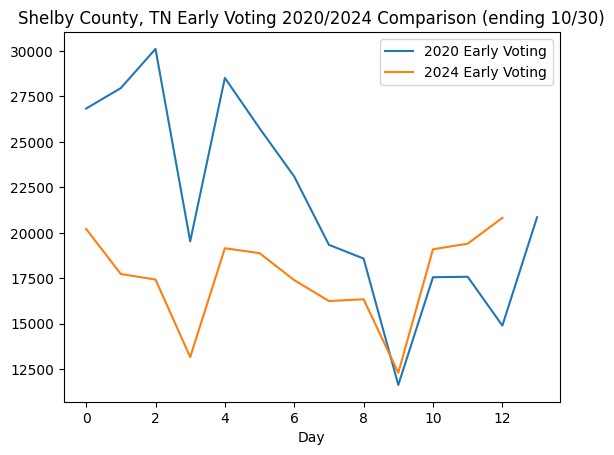

In [179]:
ax = plt.gca()
shelby_2020.plot(x="Day", y="EarlyVoting", label="2020 Early Voting", ax= ax )
shelby_2024.plot(x="Day", y="EarlyVoting", label="2024 Early Voting", ax=ax)
plt.title("Shelby County, TN Early Voting 2020/2024 Comparison (ending 10/30)")

Text(0.5, 1.0, 'Shelby County, TN Early/Absentee Combined 2016-2024 Comparison (ending 10/30)')

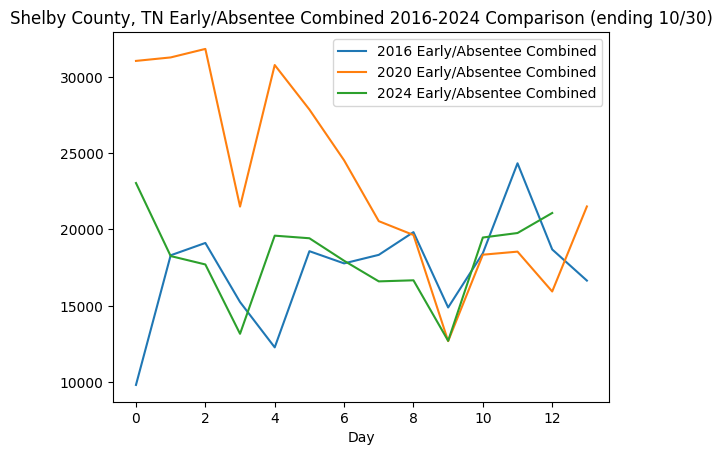

In [180]:
ax = plt.gca()
shelby_2016.plot(x="Day", y="EarlyTotal", label="2016 Early/Absentee Combined", ax=ax)
shelby_2020.plot(x="Day", y="Day Total", label="2020 Early/Absentee Combined", ax=ax)
shelby_2024.plot(x="Day", y="Day Total", label="2024 Early/Absentee Combined", ax=ax)
plt.title("Shelby County, TN Early/Absentee Combined 2016-2024 Comparison (ending 10/30)")

Text(0.5, 1.0, 'Shelby County 2024 Daily Turnout Percentage')

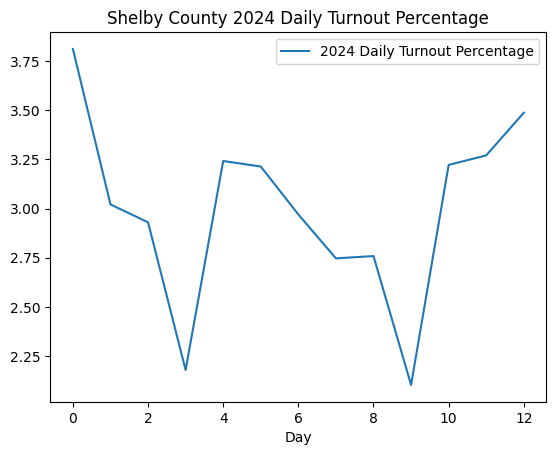

In [181]:
ax = plt.gca()
shelby_2024.plot(x="Day", y="Percentage By Day", label="2024 Daily Turnout Percentage", ax=ax)
plt.title('Shelby County 2024 Daily Turnout Percentage')

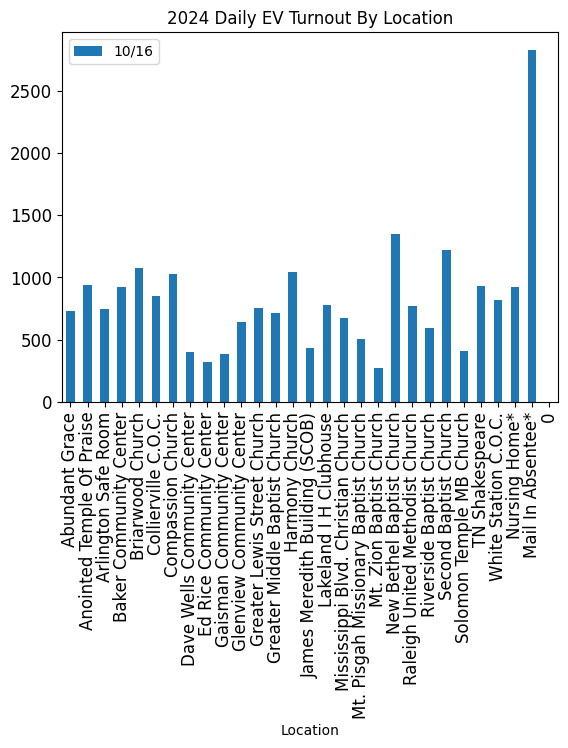

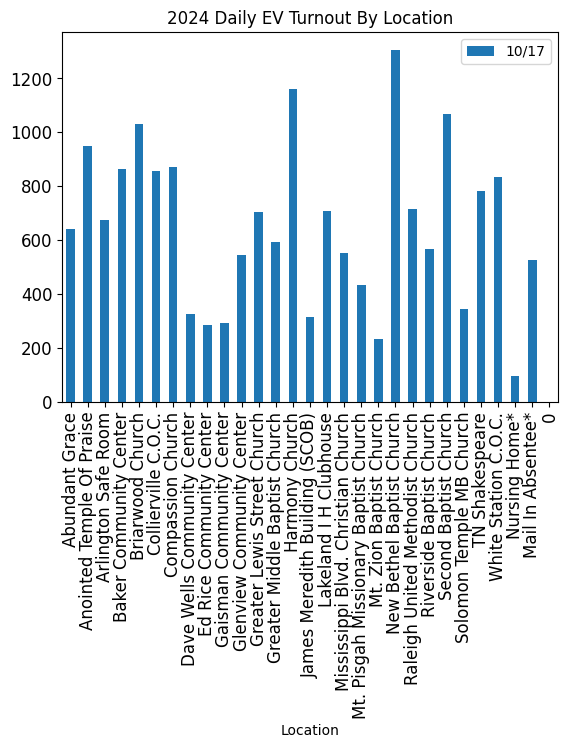

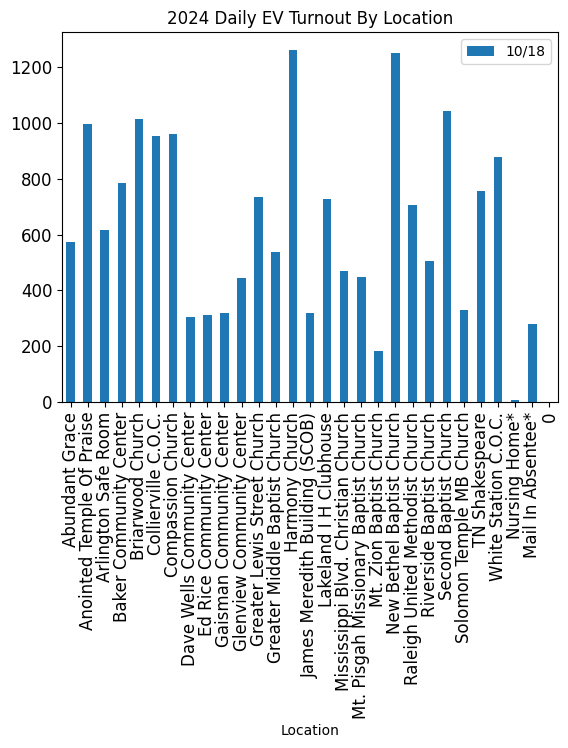

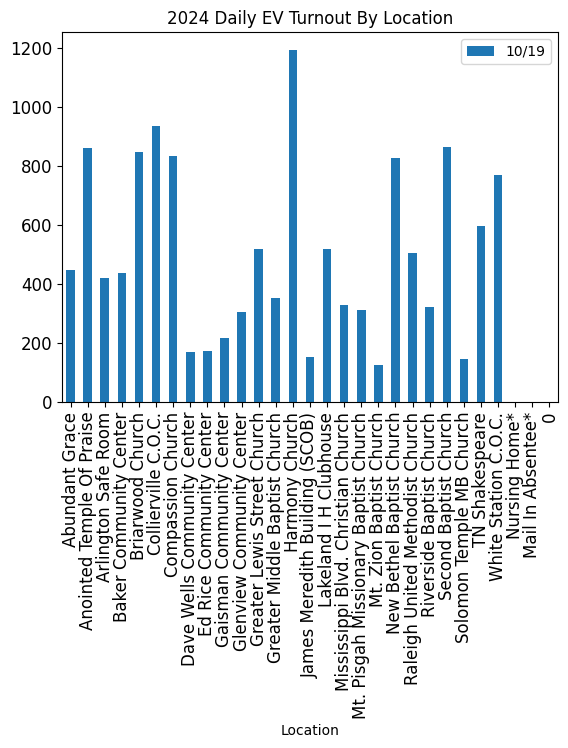

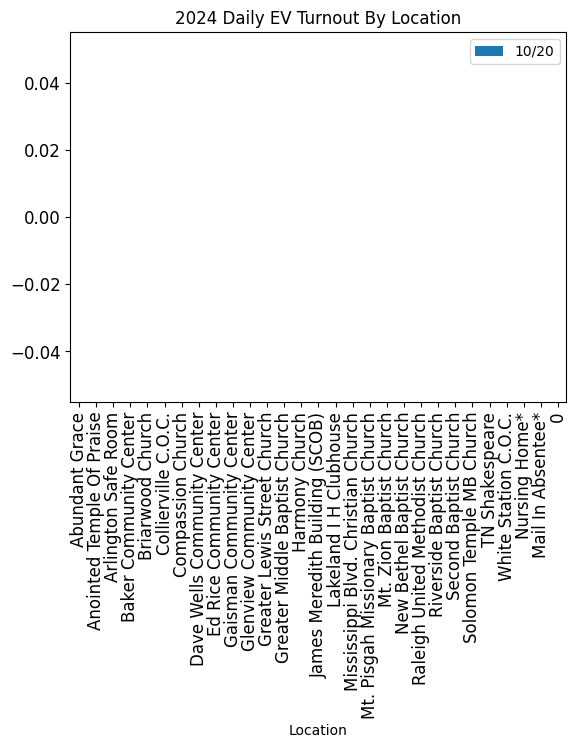

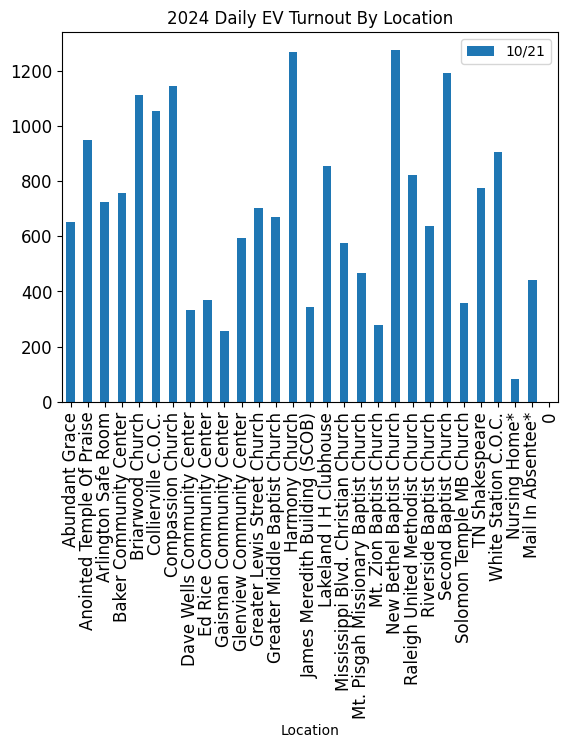

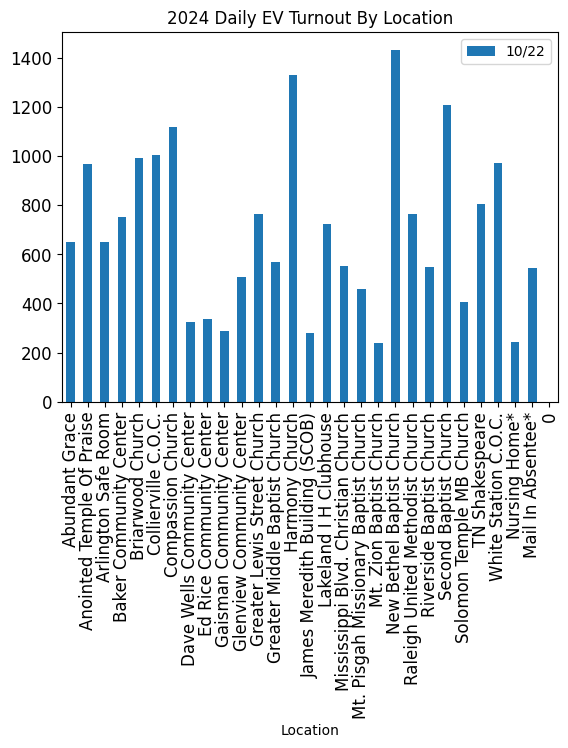

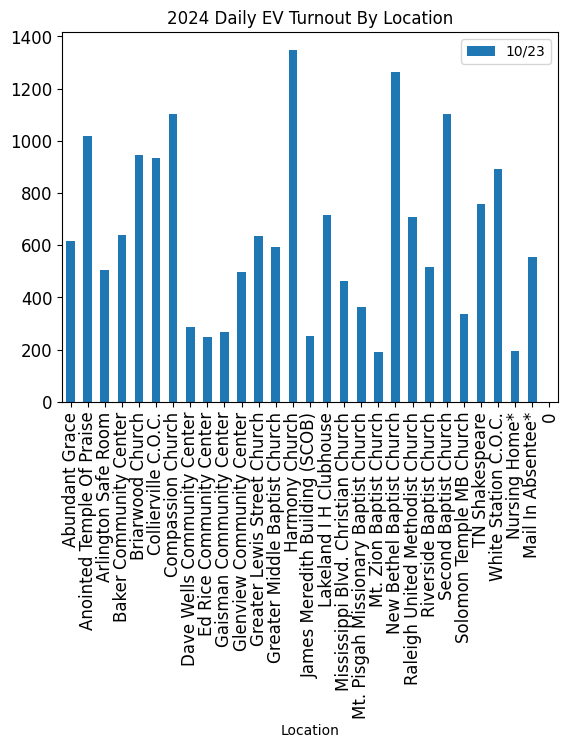

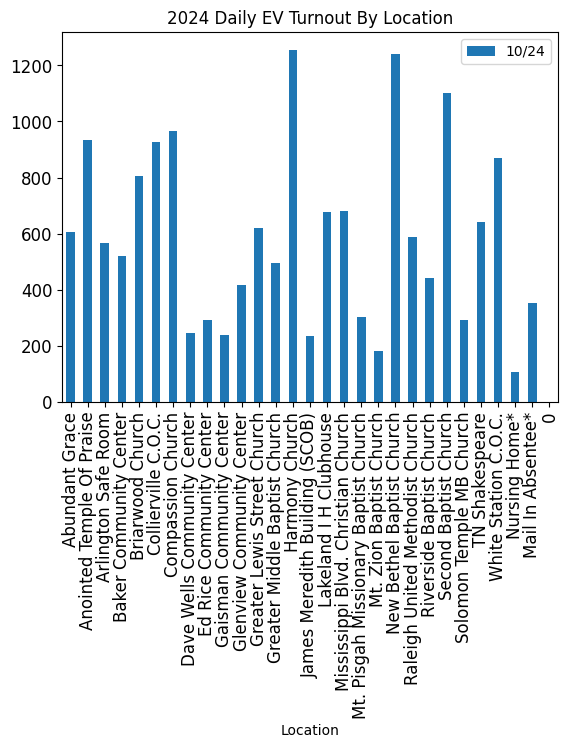

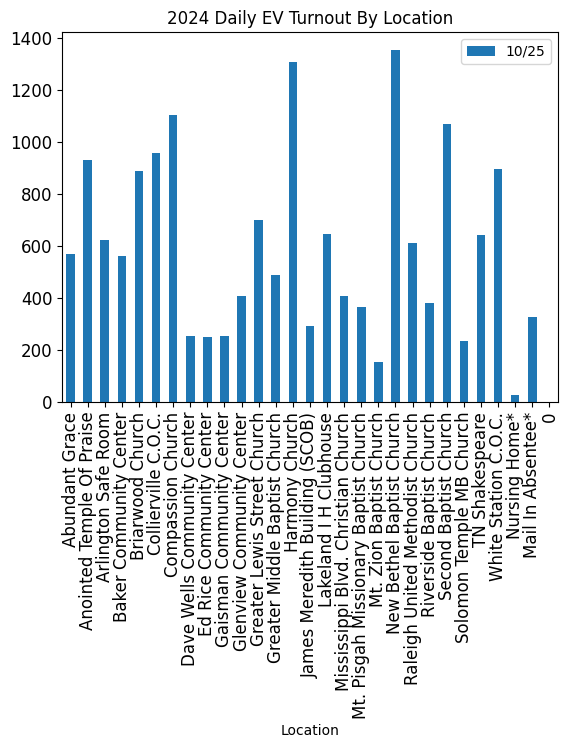

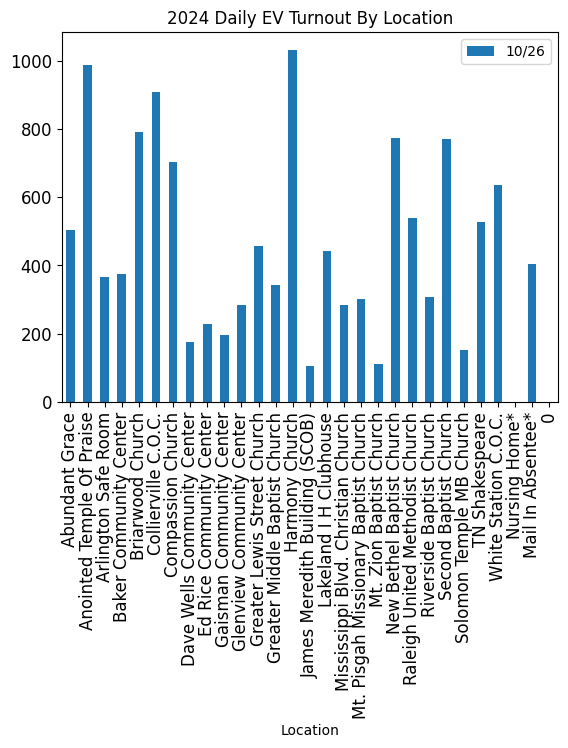

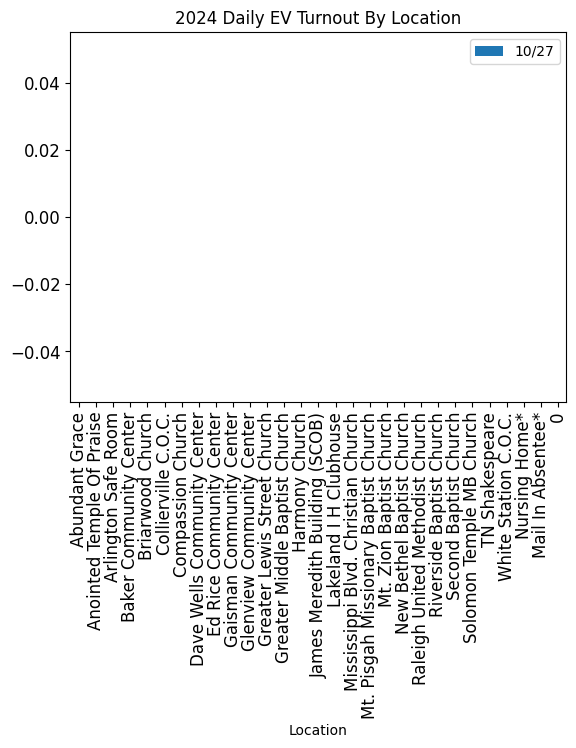

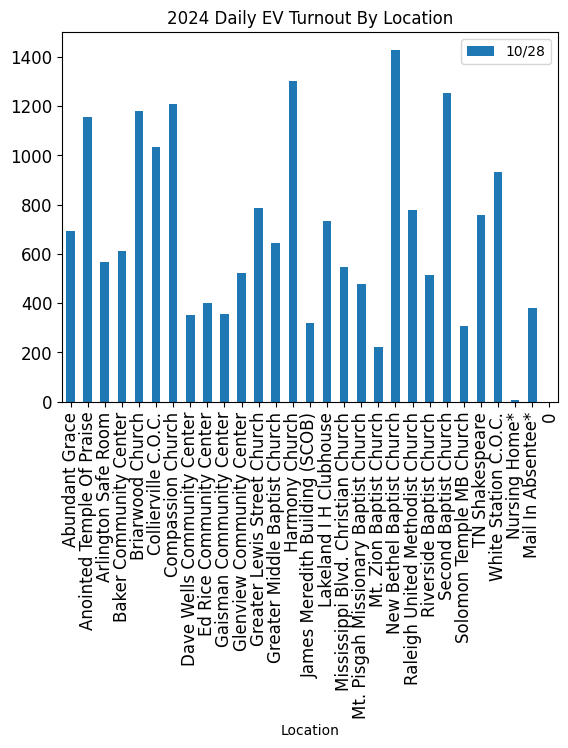

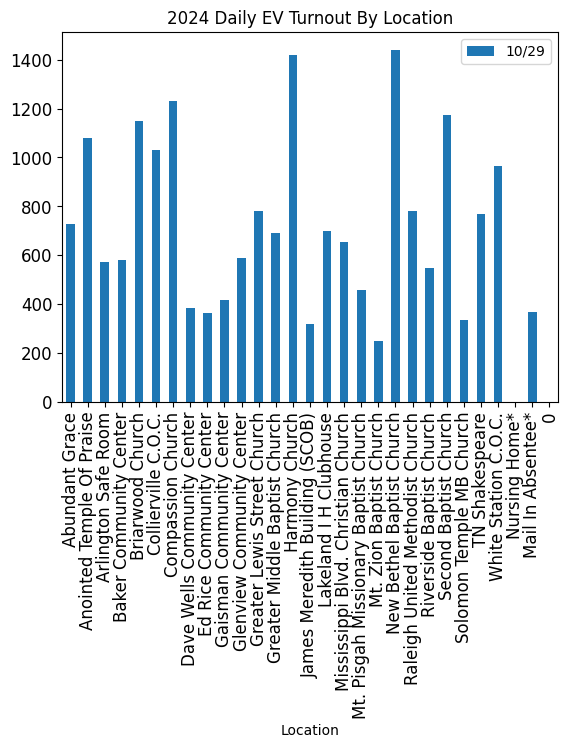

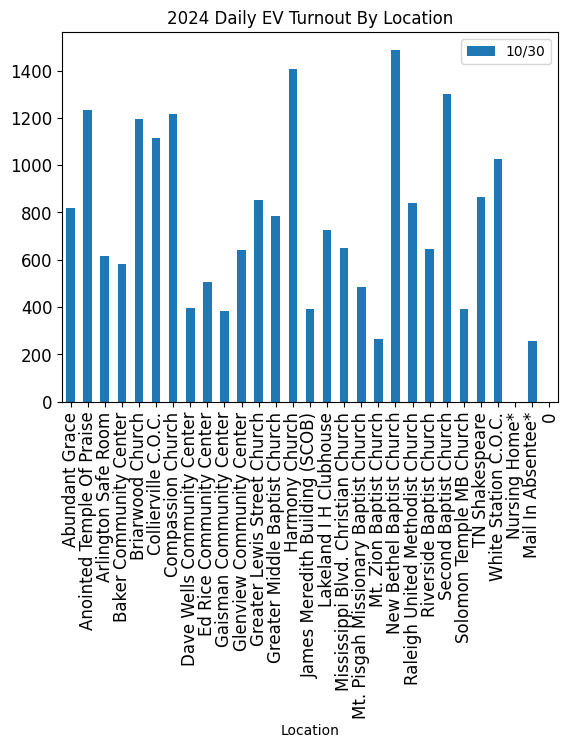

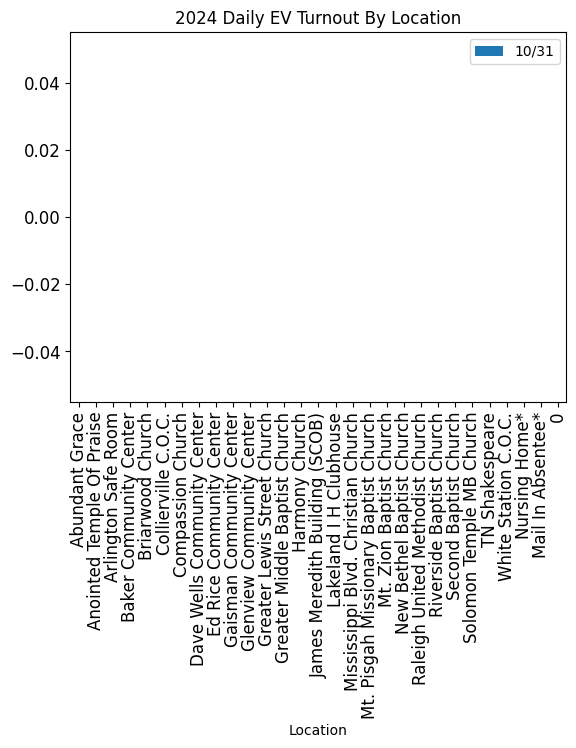

In [182]:
date_list = ['10/16', '10/17', '10/18', '10/19', '10/20', '10/21', '10/22', '10/23', '10/24', '10/25', '10/26', '10/27', '10/28', '10/29', '10/30', '10/31']

for i in date_list:
    ax = ev_location_2024.plot(kind='bar', x='Location', y=i, fontsize=12)
    plt.title('2024 Daily EV Turnout By Location')

In [18]:
ev_location_2024['Latitude'] = ev_location_gis['Latitude']
ev_location_2024['Longitude'] = ev_location_gis['Longitude']
ev_location_2024 = ev_location_2024.fillna(0)
#print(ev_location_2024)

max_amount = float(ev_location_2024.loc[0:25, 'Total'].max())

hmap = folium.Map(location=[35.117500, -89.971107], zoom_start=10, )

hm_wide = HeatMap( list(zip(ev_location_2024.Latitude.values, ev_location_2024.Longitude.values, ev_location_2024.Total.values.astype(float))),
                  min_opacity=0.2,
                  max_val=max_amount,
                  radius=17, blur=15,
                  max_zoom=1,
                  )

hmap.add_child(hm_wide)

/tmp/ipykernel_17213/3966586309.py:10: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  hm_wide = HeatMap( list(zip(ev_location_2024.Latitude.values, ev_location_2024.Longitude.values, ev_location_2024.Total.values.astype(float))),
